In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime

In [12]:
def open_and_split(fileName, starting_index):
    dummy = open(fileName, "r")
    length = len(dummy.readlines()) - 1
    dummy.close()
    
    file = open(fileName, "r")
    data = [next(file) for _ in range(length)]
    file.close()

    #divide linens and split the data
    data = [data[i].replace("\n", "") for i in range(len(data))]
    data = [data[i].split() for i in range(len(data))]
    
    #delete first row
    print(f"deleted rows: {data[0]}")
    data = data[starting_index:]
    print(type(data))
    
    return data

#function that filter year
def filter_year(DataFrame, year):
    condition = DataFrame["Year"] == year
    return DataFrame.where(condition).dropna().reset_index().drop("index", axis = 1).drop("Year", axis=1)

#convert Day-Hour to composite
def D_to_C(DataFrame):
    composite = [int(DataFrame["Day"][i]) * 24 + int(DataFrame["Hour"][i]) for i in range(DataFrame.shape[0])]
    
    new = DataFrame.copy()
    new.insert(0, "Time", composite)
    new = new.drop(["Day", "Hour"], axis = 1)
    
    return new

#DLL file with specific columns with conversion of hr:mm to hr
def dll_convert(DataFrame):
    converted = [[int(DataFrame[i][1]), int(DataFrame[i][2][:2]), float(DataFrame[i][6])] for i in range(len(DataFrame))]
    return converted

def standard_units(DataFrame):
    mean_E1 = DataFrame["kp"].mean()
    std_E1 = np.std(DataFrame["kp"])
    mean_DLL = DataFrame["DLL"].mean()
    std_DLL = np.std(DataFrame["DLL"])
    
    std1 = [((DataFrame["kp"][i] - mean_E1) / std_E1) for i in range(len(DataFrame))]
    std2 = [((DataFrame["DLL"][i] - mean_DLL) / std_DLL) for i in range(len(DataFrame))]
    
    return pd.DataFrame({"kp STD": std1, "DLL STD": std2})

def correlation_coefficient(dataframe):
    return np.mean(dataframe["kp STD"] * dataframe["DLL STD"])

In [13]:
dll_row = open_and_split("DLL_zenodo_1995_T1h.txt", 21)
dll_row_selected = dll_convert(dll_row)

dll = pd.DataFrame(dll_row_selected, columns=["Day", "Hour", "DLL"])
dll = D_to_C(dll)

grouped_dll = dll.groupby("Time").mean()

deleted rows: ['****************************************************************************************']
<class 'list'>


In [14]:
kp_row = open_and_split("1995 KP-10 index -- hourly avg (1).lst", 0)
kp_data = pd.DataFrame(kp_row, columns = ["Year", "Day", "Hour", "kp"])

kp_data

deleted rows: ['1995', '1', '0', '10']
<class 'list'>


,Year,Day,Hour,kp
0,1995,1,0,10
1,1995,1,1,10
2,1995,1,2,10
3,1995,1,3,0
4,1995,1,4,0
...,...,...,...,...
8754,1995,365,18,20
8755,1995,365,19,20
8756,1995,365,20,20
8757,1995,365,21,10


In [15]:
kp = D_to_C(kp_data).groupby("Time").mean()
print(kp)

        Year    kp
Time              
24    1995.0  10.0
25    1995.0  10.0
26    1995.0  10.0
27    1995.0   0.0
28    1995.0   0.0
...      ...   ...
8778  1995.0  20.0
8779  1995.0  20.0
8780  1995.0  20.0
8781  1995.0  10.0
8782  1995.0  10.0

[8759 rows x 2 columns]


In [16]:
combined = pd.merge(left=kp, right=grouped_dll, left_on="Time", right_on="Time").reset_index()
combined

,Time,Year,kp,DLL
0,28,1995.0,0.0,-9.117692
1,30,1995.0,7.0,-9.576429
2,31,1995.0,7.0,-8.836842
3,32,1995.0,7.0,-8.737458
4,35,1995.0,13.0,-7.578333
...,...,...,...,...
7962,8778,1995.0,20.0,-7.472881
7963,8779,1995.0,20.0,-7.786724
7964,8780,1995.0,20.0,-8.430000
7965,8781,1995.0,10.0,-8.360167


In [18]:
std = standard_units(combined)
val = correlation_coefficient(std)

print(std)
val

        kp STD   DLL STD
0    -1.549429 -1.148077
1    -1.052259 -1.791964
2    -1.052259 -0.753872
3    -1.052259 -0.614375
4    -0.626114  1.012586
...        ...       ...
7962 -0.128944  1.160600
7963 -0.128944  0.720086
7964 -0.128944 -0.182823
7965 -0.839186 -0.084804
7966 -0.839186  0.217986

[7967 rows x 2 columns]


0.543939636110566

In [24]:
len(combined["kp"]) == len(combined["DLL"])

True

Text(0.5, 0.98, 'kp vs DLL')

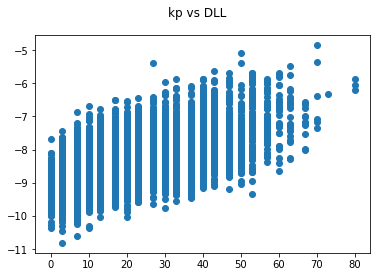

In [30]:
plt.scatter("kp", "DLL", data = combined)
plt.suptitle("kp vs DLL")
#draw best fit.

Text(0.5, 0.98, 'kp STD vs DLL STD')

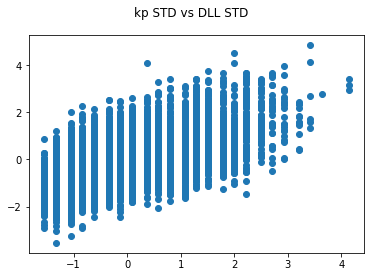

In [29]:
plt.scatter("kp STD", "DLL STD", data=std)
plt.suptitle("kp STD vs DLL STD")

In [ ]:
#get median for each x get y=ax and compare it.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28a83fbe-9ed8-4ad0-ab71-9db262ace005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>